__HUMAN ACTIVITY RECOGNIZATION__

In [569]:
import pandas as pd
import numpy as np

In [570]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# Utility function to print the confusion matrix
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

### Data

In [571]:
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [572]:
from sklearn.preprocessing import StandardScaler

In [573]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals():
    signals_data_train = []
    signals_data_test = []

    for signal in SIGNALS:
        filename_train = f'UCI_HAR_Dataset/train/Inertial Signals/{signal}_train.txt'
        df_train =  _read_csv(filename_train)
        # standardizing the data
        s = StandardScaler()
        df_train_std = s.fit_transform(df_train)
        df_train_std_df = pd.DataFrame(df_train_std)
        filename_test = f'UCI_HAR_Dataset/test/Inertial Signals/{signal}_test.txt'
        df_test =  _read_csv(filename_test)
        df_test_std = s.transform(df_test)
        df_test_std_df = pd.DataFrame(df_test_std)
        signals_data_train.append(df_train_std_df.values)
        signals_data_test.append(df_test_std_df.values)
        # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    final_train = np.transpose(signals_data_train, (1, 2, 0))
    final_test = np.transpose(signals_data_test, (1, 2, 0))
    
      # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return final_train, final_test

In [574]:
def load_y_2class(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]
    
    # Making Class labels for baseline classifier i.e. for all dynamic activities will be labled as 0 and static activities \ 
    # will be labeled as 1
    
    y[y==1] = 0
    y[y==2] = 0
    y[y==3] = 0
    y[y==4] = 1
    y[y==5] = 1
    y[y==6] = 1

    return pd.get_dummies(y).values

In [575]:
def load_y_static(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]
    # intially static activities are labeled as 4,5,6 so we are filtering only static labels
    y_static_con = y>3 # preparing indices for the X_data
    y= y[y_static_con]
    return pd.get_dummies(y).values , y_static_con

In [576]:
def load_data_static():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    
    y_train,y_train_con  = load_y_static('train')
    y_test,y_test_con =load_y_static('test')
    X_train, X_test = load_signals()
    X_train_static = X_train[y_train_con] # taking only data with static value
    X_test_static = X_test[y_test_con]
    

    return X_train_static, X_test_static, y_train, y_test

In [577]:
def load_y_dynamic(subset):
    """
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]
    y_dynamic_con = y<4
    y= y[y_dynamic_con]
    return pd.get_dummies(y).as_matrix() , y_dynamic_con

In [578]:
def load_data_dynamic():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    
    y_train,y_train_con  = load_y_dynamic('train')
    y_test,y_test_con =load_y_dynamic('test')
    X_train, X_test = load_signals()
    X_train_dynamic = X_train[y_train_con] # taking only dynamic activity labeled data
    X_test_dynamic = X_test[y_test_con]
    

    return X_train_dynamic, X_test_dynamic, y_train, y_test

In [579]:
def load_data_2class():
    """
    this is for dividing among static and dynamic
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals()
    y_train, y_test = load_y_2class('train'), load_y_2class('test')

    return X_train, X_test, y_train, y_test

In [580]:
def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).as_matrix()

In [581]:
from sklearn.preprocessing import StandardScaler

In [582]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals_train(), load_signals_test()
    y_train, y_test = load_y('train'), load_y('test')
    return X_train, X_test, y_train, y_test

In [583]:
# Loading static data
X_train_static, X_test_static, Y_train_static, Y_test_static = load_data_static()

In [584]:
print("shape of static x_train data",X_train_static.shape)
print("shape of static x_test data",X_test_static.shape)
print("shape of static y_train data",Y_train_static.shape)
print("shape of static y_test data",Y_test_static.shape)

shape of static x_train data (4067, 128, 9)
shape of static x_test data (1560, 128, 9)
shape of static y_train data (4067, 3)
shape of static y_test data (1560, 3)


In [585]:
# Loading dynamic data
X_train_dynamic, X_test_dynamic, Y_train_dynamic, Y_test_dynamic = load_data_dynamic()

In [586]:
print("shape of dynamic x_train data",X_train_dynamic.shape)
print("shape of dynamic x_test data",X_test_dynamic.shape)
print("shape of dynamic y_train data",Y_train_dynamic.shape)
print("shape of dynamic y_test data",Y_test_dynamic.shape)

shape of dynamic x_train data (3285, 128, 9)
shape of dynamic x_test data (1387, 128, 9)
shape of dynamic y_train data (3285, 3)
shape of dynamic y_test data (1387, 3)


In [587]:
# Loading the train and test whole data labeled as 0 and 1 for binary classification
X_train_2, X_test_2, Y_train_2, Y_test_2 = load_data_2class()

In [588]:
Y_test_2.shape

(2947, 2)

In [589]:
# Loading the train and test whole data labeled as 1 to 6 for final classification
X_train, X_test, Y_train, Y_test = load_data()

In [590]:
# Importing tensorflow
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)
import tensorflow as tf
tf.compat.v1.set_random_seed(42)

In [591]:
# Configuring a session
session_conf = tf.compat.v1.ConfigProto()

In [592]:
# Import Keras
from keras import backend as K
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

In [593]:
# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

In [594]:
# Initializing parameters
epochs = 20
batch_size = 32

In [595]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [596]:
X_train.shape

(7352, 128, 9)

In [597]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))
print(n_classes)

128
9
7352
6


In [598]:
Y_train.shape

(7352, 6)

- Defining the Architecture of LSTM

<H1>MODEL 1 WITH 256 LSTM UNITS AND DROPOUT = 0.5</H1>

In [599]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(256, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.7))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 256)               272384    
_________________________________________________________________
dropout_33 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 6)                 1542      
Total params: 273,926
Trainable params: 273,926
Non-trainable params: 0
_________________________________________________________________


In [600]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [601]:
# Training the model
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/20
7352/7352 [==============================] - 247s 34ms/step - loss: 1.0109 - acc: 0.5590 - val_loss: 0.8028 - val_acc: 0.5589
Epoch 2/20
7352/7352 [==============================] - 251s 34ms/step - loss: 0.6508 - acc: 0.7111 - val_loss: 0.6791 - val_acc: 0.7082
Epoch 3/20
7352/7352 [==============================] - 250s 34ms/step - loss: 0.3603 - acc: 0.8670 - val_loss: 0.2927 - val_acc: 0.8921
Epoch 4/20
7352/7352 [==============================] - 248s 34ms/step - loss: 0.2136 - acc: 0.9248 - val_loss: 0.3399 - val_acc: 0.9067
Epoch 5/20
7352/7352 [==============================] - 252s 34ms/step - loss: 0.1842 - acc: 0.9327 - val_loss: 0.2983 - val_acc: 0.9158
Epoch 6/20
7352/7352 [==============================] - 253s 34ms/step - loss: 0.1626 - acc: 0.9412 - val_loss: 0.2658 - val_acc: 0.9152
Epoch 7/20
7352/7352 [==============================] - 251s 34ms/step - loss: 0.1526 - acc: 0.9426 - val_loss: 0.2652 - val_acc: 

In [602]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  0      365       123        0                   0   
STANDING                 0       53       476        3                   0   
WALKING                  0        0         1      469                  26   
WALKING_DOWNSTAIRS       0        0         0        2                 408   
WALKING_UPSTAIRS         0        1         1        2                  19   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            3  
STANDING                           0  
WALKING                            0  
WALKING_DOWNSTAIRS                10  
WALKING_UPSTAIRS                 448  


In [603]:
score = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 31s 11ms/step


In [604]:
score

[0.41806976127311524, 0.9172039362063115]

__getting test accuraccy 0.925__

<H1>MODEL 2 TRY CNN LAYERS</H1>

In [605]:
from keras.layers import Conv1D, Conv2D
from keras.layers import MaxPooling1D
from keras.layers import Dense, Activation, Flatten
from keras.layers import TimeDistributed
from hyperas.distributions import uniform , choice
from keras.layers.normalization import BatchNormalization

In [608]:
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=7,activation='relu',
             kernel_regularizer=regularizers.l2(0.0007),input_shape=(128,9)))

model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
model.add(Dropout(0.6))
model.add(MaxPooling1D(pool_size=5))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [609]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [610]:
# Training the model
history=model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=30)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 17s 2ms/step - loss: 0.3447 - acc: 0.8765 - val_loss: 0.3057 - val_acc: 0.9196
Epoch 2/30
7352/7352 [==============================] - 12s 2ms/step - loss: 0.1457 - acc: 0.9468 - val_loss: 0.2750 - val_acc: 0.9165
Epoch 3/30
7352/7352 [==============================] - 12s 2ms/step - loss: 0.1177 - acc: 0.9539 - val_loss: 0.2717 - val_acc: 0.9094
Epoch 4/30
7352/7352 [==============================] - 12s 2ms/step - loss: 0.1210 - acc: 0.9585 - val_loss: 0.2908 - val_acc: 0.9172
Epoch 5/30
7352/7352 [==============================] - 11s 1ms/step - loss: 0.1129 - acc: 0.9608 - val_loss: 0.3173 - val_acc: 0.9199
Epoch 6/30
7352/7352 [==============================] - 10s 1ms/step - loss: 0.1027 - acc: 0.9646 - val_loss: 0.2687 - val_acc: 0.9182
Epoch 7/30
7352/7352 [==============================] - 11s 1ms/step - loss: 0.0895 - acc: 0.9693 - val_loss: 0.3473 - val_acc: 0.9152
Epoch 8

In [615]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  6      401        83        0                   0   
STANDING                 0       71       461        0                   0   
WALKING                  0        8         0      472                  16   
WALKING_DOWNSTAIRS       0        1         0        4                 411   
WALKING_UPSTAIRS         0        8         0        3                  31   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            1  
STANDING                           0  
WALKING                            0  
WALKING_DOWNSTAIRS                 4  
WALKING_UPSTAIRS                 429  


In [616]:
score = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 1s 465us/step


In [617]:
score

[0.5513466087953368, 0.9199185612487275]

<h1>MODEL 3 TWO LSTM LAYER</h1>

In [ ]:
from keras import regularizers

In [618]:
model = Sequential()
# Configuring the parameters
model.add(LSTM(32,return_sequences=True,input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))

model.add(LSTM(28,input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.6))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 128, 32)           5376      
_________________________________________________________________
dropout_35 (Dropout)         (None, 128, 32)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 28)                6832      
_________________________________________________________________
dropout_36 (Dropout)         (None, 28)                0         
_________________________________________________________________
dense_67 (Dense)             (None, 6)                 174       
Total params: 12,382
Trainable params: 12,382
Non-trainable params: 0
_________________________________________________________________


In [619]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [620]:
# Training the model
history=model.fit(X_train,
          Y_train,
          batch_size=32,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/20
7352/7352 [==============================] - 101s 14ms/step - loss: 1.1560 - acc: 0.5570 - val_loss: 0.8574 - val_acc: 0.5901
Epoch 2/20
7352/7352 [==============================] - 97s 13ms/step - loss: 0.7567 - acc: 0.6506 - val_loss: 0.7961 - val_acc: 0.6335
Epoch 3/20
7352/7352 [==============================] - 97s 13ms/step - loss: 0.6427 - acc: 0.7297 - val_loss: 0.6118 - val_acc: 0.7316
Epoch 4/20
7352/7352 [==============================] - 97s 13ms/step - loss: 0.5169 - acc: 0.8100 - val_loss: 0.5924 - val_acc: 0.8191
Epoch 5/20
7352/7352 [==============================] - 96s 13ms/step - loss: 0.3997 - acc: 0.8738 - val_loss: 0.4450 - val_acc: 0.8690
Epoch 6/20
7352/7352 [==============================] - 97s 13ms/step - loss: 0.3227 - acc: 0.9045 - val_loss: 0.3793 - val_acc: 0.8914
Epoch 7/20
7352/7352 [==============================] - 97s 13ms/step - loss: 0.2806 - acc: 0.9185 - val_loss: 0.3573 - val_acc: 0.8887

In [621]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  3      421        45        3                   0   
STANDING                 0      129       400        3                   0   
WALKING                  0        0         1      471                   6   
WALKING_DOWNSTAIRS       0        0         0        1                 400   
WALKING_UPSTAIRS         0        0         0        2                   2   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                           19  
STANDING                           0  
WALKING                           18  
WALKING_DOWNSTAIRS                19  
WALKING_UPSTAIRS                 467  


In [622]:
score = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 4s 1ms/step


In [623]:
score

[0.35691609237638755, 0.9148286392941974]

In [624]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  3      421        45        3                   0   
STANDING                 0      129       400        3                   0   
WALKING                  0        0         1      471                   6   
WALKING_DOWNSTAIRS       0        0         0        1                 400   
WALKING_UPSTAIRS         0        0         0        2                   2   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                           19  
STANDING                           0  
WALKING                           18  
WALKING_DOWNSTAIRS                19  
WALKING_UPSTAIRS                 467  


__WE get almost same accuraccy but with CNN architecture it is better but loss is decreasing __

__from the above observation we can see that after trying all <br>
model we are not getting accuraccy above 92% because of the overlapping of sitting and standing<br>
so we use divide the model into three parts
the idea is taken from this research paper: https://www.mdpi.com/1424-8220/18/4/1055/pdf__<br>
1. into classes between static and dynamic .
2. classify 3 categories among static 
3. classify 3 categories among dynamic


In [535]:
# Initiliazing the sequential model
model_half = Sequential()
model_half.add(Conv1D(64, kernel_size=3, activation= 'relu',input_shape=(128,9)))
model_half.add(Dropout(0.6))
model_half.add(MaxPooling1D(pool_size=3))
model_half.add(Flatten())
model_half.add(Dense(50, activation='relu'))
model_half.add(Dense(2, activation='softmax'))
model_half.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_46 (Conv1D)           (None, 126, 64)           1792      
_________________________________________________________________
dropout_29 (Dropout)         (None, 126, 64)           0         
_________________________________________________________________
max_pooling1d_28 (MaxPooling (None, 42, 64)            0         
_________________________________________________________________
flatten_28 (Flatten)         (None, 2688)              0         
_________________________________________________________________
dense_57 (Dense)             (None, 50)                134450    
_________________________________________________________________
dense_58 (Dense)             (None, 2)                 102       
Total params: 136,344
Trainable params: 136,344
Non-trainable params: 0
_________________________________________________________________


In [536]:
# Compiling the model
model_half.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [537]:
# Training the model
history = model_half.fit(X_train_2,
          Y_train_2,
          batch_size=batch_size,
          validation_data=(X_test_2, Y_test_2),
          epochs=10)

Train on 7352 samples, validate on 2947 samples
Epoch 1/10
7352/7352 [==============================] - 8s 1ms/step - loss: 0.0524 - acc: 0.9830 - val_loss: 0.0213 - val_acc: 0.9942
Epoch 2/10
7352/7352 [==============================] - 6s 831us/step - loss: 0.0014 - acc: 0.9996 - val_loss: 0.0110 - val_acc: 0.9969
Epoch 3/10
7352/7352 [==============================] - 6s 771us/step - loss: 0.0027 - acc: 0.9993 - val_loss: 0.0158 - val_acc: 0.9966
Epoch 4/10
7352/7352 [==============================] - 6s 807us/step - loss: 9.8023e-04 - acc: 0.9997 - val_loss: 0.0114 - val_acc: 0.9976
Epoch 5/10
7352/7352 [==============================] - 6s 787us/step - loss: 9.1758e-05 - acc: 1.0000 - val_loss: 0.0143 - val_acc: 0.9976
Epoch 6/10
7352/7352 [==============================] - 6s 803us/step - loss: 1.5712e-05 - acc: 1.0000 - val_loss: 0.0141 - val_acc: 0.9973
Epoch 7/10
7352/7352 [==============================] - 6s 785us/step - loss: 4.1130e-05 - acc: 1.0000 - val_loss: 0.0114 - va

__from the above observation you can see that model predicts between two class static and  dynamic<br>
with almost 100% accuraccy__

<h1>CLASSIFY WITHIN STATIC</h1>

In [538]:
model_static= Sequential()
model_static.add(Conv1D(filters=32, kernel_size=5,activation='relu',input_shape=(128,9)))
model_static.add(Conv1D(filters=16, kernel_size=3, 
                  activation='relu'))
model_static.add(Dropout(0.5))
model_static.add(MaxPooling1D(pool_size=2))
model_static.add(Flatten())
model_static.add(Dense(64, activation='relu'))
model_static.add(Dense(3, activation='softmax'))
print(model_static.summary())    


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_47 (Conv1D)           (None, 124, 32)           1472      
_________________________________________________________________
conv1d_48 (Conv1D)           (None, 122, 16)           1552      
_________________________________________________________________
dropout_30 (Dropout)         (None, 122, 16)           0         
_________________________________________________________________
max_pooling1d_29 (MaxPooling (None, 61, 16)            0         
_________________________________________________________________
flatten_29 (Flatten)         (None, 976)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 64)                62528     
_________________________________________________________________
dense_60 (Dense)             (None, 3)                 195       
Total para

In [539]:
# Compiling the model
model_static.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [540]:
# Training the model
history = model_static.fit(X_train_static,
          Y_train_static,
          batch_size=64,
          validation_data=(X_test_static, Y_test_static),
          epochs=50)

Train on 4067 samples, validate on 1560 samples
Epoch 1/50
4067/4067 [==============================] - 4s 1ms/step - loss: 0.2592 - acc: 0.8800 - val_loss: 0.3110 - val_acc: 0.8718
Epoch 2/50
4067/4067 [==============================] - 2s 473us/step - loss: 0.2015 - acc: 0.9088 - val_loss: 0.3202 - val_acc: 0.9051
Epoch 3/50
4067/4067 [==============================] - 2s 475us/step - loss: 0.1964 - acc: 0.9179 - val_loss: 0.3530 - val_acc: 0.8724
Epoch 4/50
4067/4067 [==============================] - 2s 480us/step - loss: 0.1723 - acc: 0.9228 - val_loss: 0.3453 - val_acc: 0.8840
Epoch 5/50
4067/4067 [==============================] - 2s 481us/step - loss: 0.1564 - acc: 0.9287 - val_loss: 0.3922 - val_acc: 0.8737
Epoch 6/50
4067/4067 [==============================] - 2s 487us/step - loss: 0.1520 - acc: 0.9309 - val_loss: 0.4174 - val_acc: 0.8192
Epoch 7/50
4067/4067 [==============================] - 2s 475us/step - loss: 0.1387 - acc: 0.9375 - val_loss: 0.4016 - val_acc: 0.8750
Ep

__we are getting test accuracy above 92% for static__

<h1>CLASSIFY WITHING DYNAMIC</h1>

In [541]:
model_dynamic = Sequential()
model_dynamic.add(Conv1D(filters=100, kernel_size=7, activation='relu',kernel_regularizer = regularizers.l2(0.007),input_shape=(128,9)))
model_dynamic.add(Dropout(0.7))
model_dynamic.add(MaxPooling1D(pool_size=3))
model_dynamic.add(Flatten())
model_dynamic.add(Dense(50, activation='relu'))
model_dynamic.add(Dense(3, activation='softmax'))
model_dynamic.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_49 (Conv1D)           (None, 122, 100)          6400      
_________________________________________________________________
dropout_31 (Dropout)         (None, 122, 100)          0         
_________________________________________________________________
max_pooling1d_30 (MaxPooling (None, 40, 100)           0         
_________________________________________________________________
flatten_30 (Flatten)         (None, 4000)              0         
_________________________________________________________________
dense_61 (Dense)             (None, 50)                200050    
_________________________________________________________________
dense_62 (Dense)             (None, 3)                 153       
Total params: 206,603
Trainable params: 206,603
Non-trainable params: 0
_________________________________________________________________


In [542]:
# Compiling the model
model_dynamic.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [543]:
# Training the model
history = model_dynamic.fit(X_train_dynamic,
          Y_train_dynamic,
          batch_size=30,
          validation_data=(X_test_dynamic, Y_test_dynamic),
          epochs=30)

Train on 3285 samples, validate on 1387 samples
Epoch 1/30
3285/3285 [==============================] - 6s 2ms/step - loss: 0.6818 - acc: 0.7973 - val_loss: 0.3798 - val_acc: 0.9315
Epoch 2/30
3285/3285 [==============================] - 4s 1ms/step - loss: 0.1528 - acc: 0.9805 - val_loss: 0.2361 - val_acc: 0.9524
Epoch 3/30
3285/3285 [==============================] - 4s 1ms/step - loss: 0.1058 - acc: 0.9927 - val_loss: 0.2766 - val_acc: 0.9445
Epoch 4/30
3285/3285 [==============================] - 4s 1ms/step - loss: 0.0923 - acc: 0.9924 - val_loss: 0.3321 - val_acc: 0.9503
Epoch 5/30
3285/3285 [==============================] - 3s 1ms/step - loss: 0.0736 - acc: 0.9960 - val_loss: 0.2181 - val_acc: 0.9603
Epoch 6/30
3285/3285 [==============================] - 4s 1ms/step - loss: 0.0534 - acc: 0.9976 - val_loss: 0.1871 - val_acc: 0.9553
Epoch 7/30
3285/3285 [==============================] - 4s 1ms/step - loss: 0.0427 - acc: 0.9951 - val_loss: 0.5911 - val_acc: 0.8789
Epoch 8/30
328

__we are getting test accuracy 95% for dynamic__

In [544]:
from sklearn.metrics import accuracy_score

In [545]:
def load_y(subset):
        """
        The objective that we are trying to predict is a integer, from 1 to 6,
        that represents a human activity. We return a binary representation of 
        every sample objective as a 6 bits vector using One Hot Encoding
        (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
        """
        filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
        y = _read_csv(filename)[0]
        return y


In [546]:
Y_train,Y_test= load_y('train'), load_y('test')
X_train, X_test = load_signals_train(), load_signals_test()

In [547]:
def final_predict(data):
    class_pred = model_half.predict(data) #classify of static and dynamic
    prob_compare =  np.argmax(class_pred, axis=1) #return  index value of max probale class
    # prob_compare will have values of 0 and 1. 0 = Dynamic , 1 =  Static
    # send dynamic predicted label to dynamic classifier
    # send static predicted label to static classifier
    dynamic_data = data[prob_compare==0] #Dynamic data
    dynamic_pred = model_dynamic.predict(dynamic_data) #predicting label with dynamic classifier
    dynamic_label_pred = np.argmax(dynamic_pred,axis=1) #taking index of max probale class
    # dynamic_label_pred contains index of max probable class i.e 0,1 or 2
    # But our actual classes are 1,2 and 3.
    # So adding 1 to the predicted class to get actual class labels
    dynamic_ACTUALlabel_pred = dynamic_label_pred + 1
   
    static_data = data[prob_compare==1] #static data
    static_pred = model_static.predict(static_data) #predicting label with static classifier
    static_label_pred = np.argmax(static_pred,axis=1) #taking index of max probale class
    # static_label_pred contains index of max probable class i.e 0,1 or 2
    # But our actual classes are 4,5 and 6.
    # So adding 4 to the predicted class to get actual class labels
    static_ACTUALlabel_pred = static_label_pred + 4
    
    # Now we got prediction for static and dynamic data
    # But we need in combine format
    
    static,dynamic = 0,0 
    final_prediction = []
    for class_2 in prob_compare:
        if class_2 == 0:
            final_prediction.append(dynamic_ACTUALlabel_pred[dynamic])
            dynamic = dynamic + 1
        else:
            final_prediction.append(static_ACTUALlabel_pred[static])
            static = static + 1 
    return final_prediction
  

In [548]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix as cm
import seaborn as sns

In [549]:
def plot_confusion_matrix(test_y, predict_y):
    C = cm(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels =[ 'WALKING',
    'WALKING_UPSTAIRS',
    'WALKING_DOWNSTAIRS',
    'SITTING',
    'STANDING',
    'LAYING']
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

In [632]:
train_pred = final_predict(X_train)
print('Train data Accuracy',accuracy_score(Y_train,train_pred))
test_pred = final_predict(X_test)
print('Test data Accuracy',accuracy_score(Y_test,test_pred))

Train data Accuracy 0.9885919477693145
Test data Accuracy 0.9471007804546997


confusion matrix of train data
-------------------- Confusion matrix --------------------


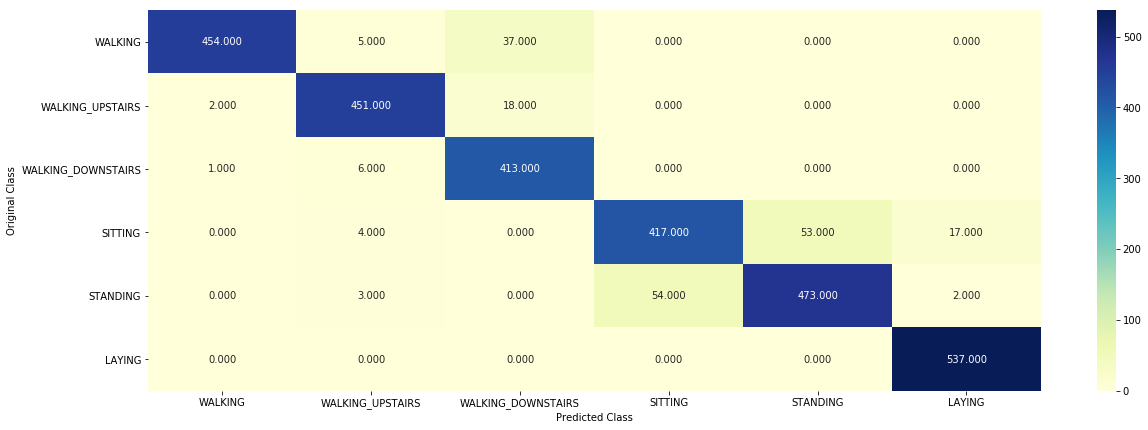

-------------------- Precision matrix (Columm Sum=1) --------------------


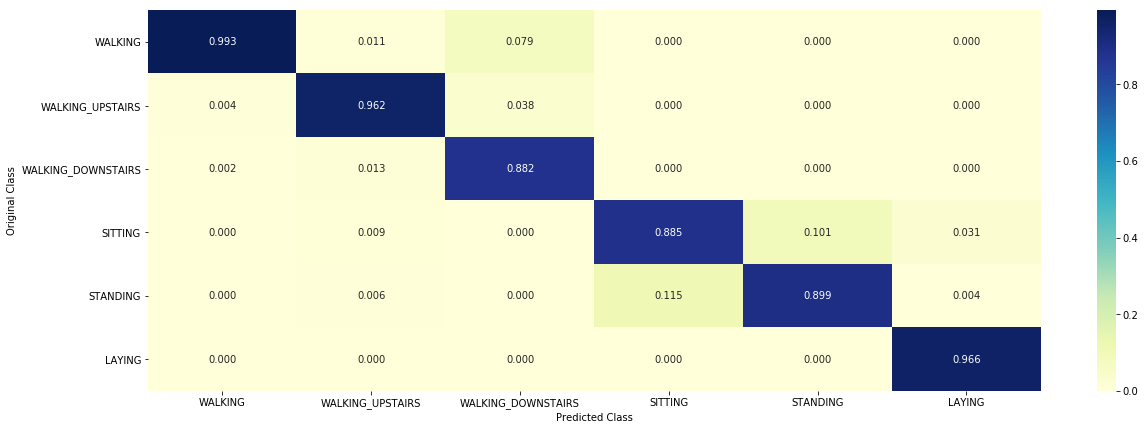

-------------------- Recall matrix (Row sum=1) --------------------


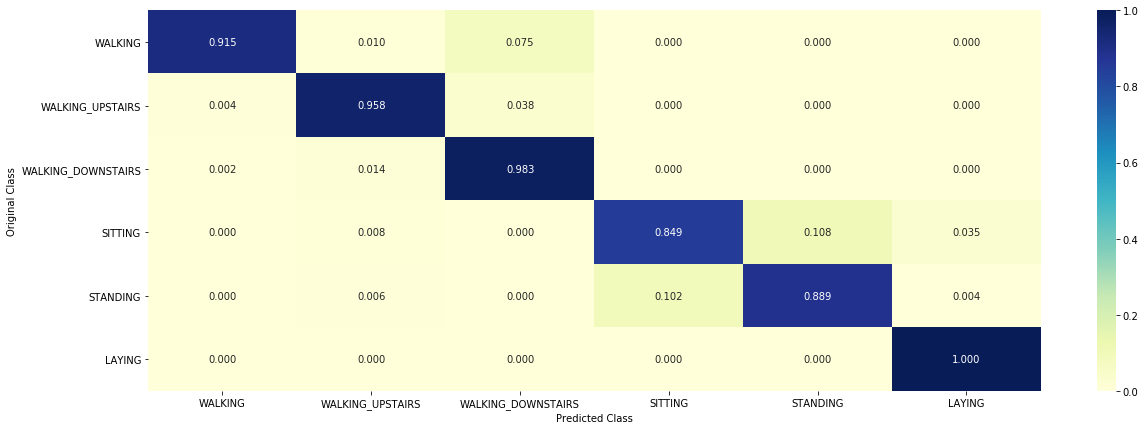

In [555]:
print("confusion matrix of train data")
plot_confusion_matrix(Y_test,test_pred)

__from the heat map observation You can see that Divide and Conquer technique works very well__

In [629]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Models","Test auc",'test loss']
x.add_row(["with no of LSTM layers 256","0.917","0.418"])
x.add_row(["by trying CNN architecture","0.9199","0.55"])
x.add_row(["by adding two lstm layers","0.914","0.35"])
x.add_row(["by DIVIDE AND CONQUER METHOD","0.9471","--"])

In [630]:
print(x)

+------------------------------+----------+-----------+
|            Models            | Test auc | test loss |
+------------------------------+----------+-----------+
|  with no of LSTM layers 256  |  0.917   |   0.418   |
|  by trying CNN architecture  |  0.9199  |    0.55   |
|  by adding two lstm layers   |  0.914   |    0.35   |
| by DIVIDE AND CONQUER METHOD |  0.9471  |     --    |
+------------------------------+----------+-----------+


__I follow the research paper architecture if you want to improve the accuracy more try hyperparameter tunning<br>
of deep learning which will improve accuracy maybe 1 or 2 percent__

__END__